---
title: "Polynomial Regression"
format:
  html:
    theme: darkly
embed-resource: true
---

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

**Let**'s use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot

In [3]:
!pip install palmerpenguins

Apply both the OneHotEncoder and get_dummies functions to the species variable in the Palmer Penguins dataset. Observe the results and discuss the differences, if there are any.

In [4]:
from palmerpenguins import load_penguins
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [21]:
pen = load_penguins()
pen.head()

penguins = load_penguins()
penguins=penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [6]:
pd.get_dummies(pen[['species']])

,species_Adelie,species_Chinstrap,species_Gentoo
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
339,False,True,False
340,False,True,False
341,False,True,False
342,False,True,False


In [7]:
enc = OneHotEncoder()
enc.fit(pen[["species"]])

enc.transform(pen[["species"]]).toarray()
enc.categories_

[array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)]

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(pen[["bill_length_mm"]])

array([[-0.88449874],
       [-0.81112573],
       [-0.66437972],
       [        nan],
       [-1.32473679],
       [-0.84781224],
       [-0.92118525],
       [-0.86615549],
       [-1.80166135],
       [-0.35254443],
       [-1.12296102],
       [-1.12296102],
       [-0.5176337 ],
       [-0.976215  ],
       [-1.70994508],
       [-1.34308004],
       [-0.95787175],
       [-0.26082817],
       [-1.74663159],
       [ 0.38118565],
       [-1.12296102],
       [-1.14130427],
       [-1.47148281],
       [-1.04958801],
       [-0.9395285 ],
       [-1.58154232],
       [-0.60934996],
       [-0.62769321],
       [-1.10461777],
       [-0.62769321],
       [-0.81112573],
       [-1.23302053],
       [-0.81112573],
       [-0.5543202 ],
       [-1.37976655],
       [-0.86615549],
       [-0.9395285 ],
       [-0.31585793],
       [-1.15964752],
       [-0.75609598],
       [-1.3614233 ],
       [-0.57266346],
       [-1.45313956],
       [ 0.03266386],
       [-1.26970704],
       [-0

In [27]:
from re import X
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



lr = LinearRegression()
pen = pen.dropna()

X = pen[["bill_length_mm"]]
y = pen["bill_depth_mm"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


lr_fit_1 = lr.fit(X_train, y_train)
ytrain_preds= lr_fit_1.predict(X_train)
ytest_preds = lr_fit_1.predict(X_test)
ytest_preds
ytrain_preds

lr_fit_1.coef_
ytrain_preds




array([16.54234692, 16.98201781, 16.5335535 , 17.6679044 , 16.79735604,
       16.55114034, 16.56872718, 16.51596667, 17.03477832, 17.01719148,
       16.89408363, 17.79980566, 17.5711768 , 17.41289528, 17.63273073,
       17.5711768 , 16.99960465, 17.49203604, 17.73825174, 16.78856262,
       17.44806895, 16.71821528, 17.58876364, 16.90287705, 15.7421459 ,
       16.9292573 , 16.51596667, 17.54479655, 17.36892819, 17.36892819,
       17.35134136, 16.86770338, 17.16667958, 17.48324262, 16.60390085,
       16.70062844, 16.72700869, 16.8764968 , 16.99960465, 16.96443097,
       17.55358997, 17.18426642, 16.98201781, 16.7797692 , 16.62148768,
       16.50717325, 17.34254794, 17.28978743, 17.10512566, 16.67424819,
       17.8173925 , 17.62393731, 17.5711768 , 17.87894642, 16.57752059,
       17.6679044 , 17.65911098, 17.76463199, 17.10512566, 17.36892819,
       17.67669781, 16.47199958, 16.21699046, 17.00839806, 16.95563756,
       17.00839806, 16.43682591, 17.75583857, 17.15788617, 16.75

In [15]:
from sklearn.metrics import r2_score, mean_squared_error

In [16]:

mean_squared_error(y_test, ytest_preds)  # For the test set
mean_squared_error(y_train, ytrain_preds)  # For the training set


3.7357759401309067

In [18]:
r2_test= r2_score(y_test, ytest_preds)
r2_train= r2_score(y_train, ytrain_preds)
print(r2_test)
print(r2_train)


0.034455651841424406
0.04316274099901263


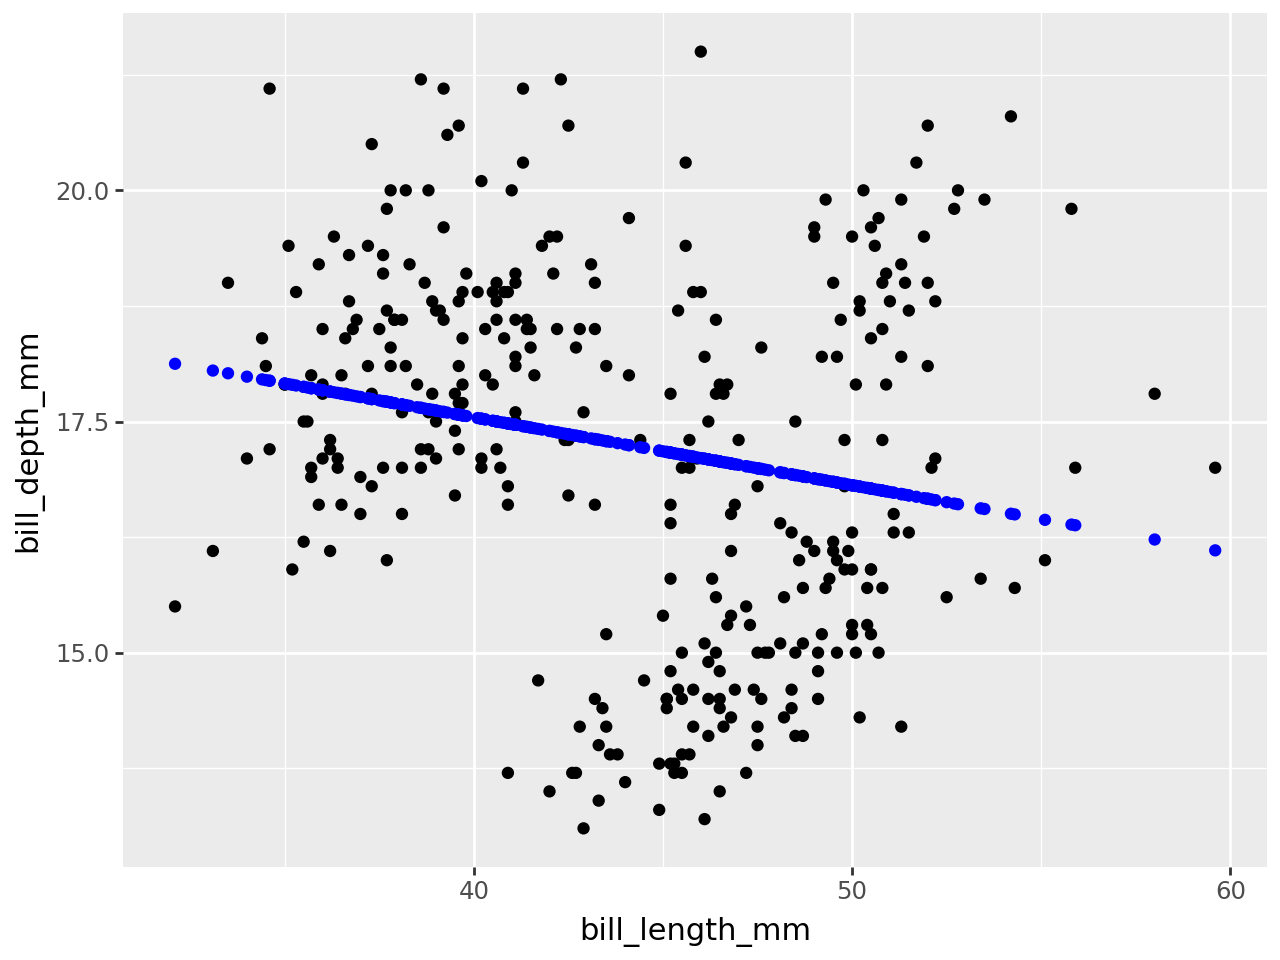

In [22]:
from plotnine import *
pred = lr_fit_1.predict(X)
(ggplot(penguins, aes(x="bill_length_mm", y="bill_depth_mm"))
+ geom_point()
+geom_point(aes(y=pred), color="blue")
)



In [28]:
final_model = lr.fit(X, y)

final_model.coef_



array([-0.08232675])

In [29]:
penguins['bill_length_mm^2'] = penguins['bill_length_mm']**2
penguins['bill_length_mm^3'] = penguins['bill_length_mm']**3
penguins['bill_length_mm^4'] = penguins['bill_length_mm']**4
penguins['bill_length_mm^5'] = penguins['bill_length_mm']**5
penguins['bill_length_mm^6'] = penguins['bill_length_mm']**6
penguins['bill_length_mm^7'] = penguins['bill_length_mm']**7
penguins['bill_length_mm^8'] = penguins['bill_length_mm']**8
penguins['bill_length_mm^9'] = penguins['bill_length_mm']**9
penguins['bill_length_mm^10'] = penguins['bill_length_mm']**10

In [32]:
X2= penguins[["bill_length_mm", "bill_length_mm^2"]]
y2= penguins["bill_depth_mm"]
lr = LinearRegression()

from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25)

lr_fit2 = lr.fit(X2_train, y2_train)


Xtrain_preds2 = lr_fit2.predict(X2_train)
Xtest_preds2 = lr_fit2.predict(X2_test)


MSE_lr2= mean_squared_error(y2_test, Xtest_preds2)
print(MSE_lr2)
r2_test2= r2_score(y2_test, Xtest_preds2)
r2_train2= r2_score(y2_train, Xtrain_preds2)
print(r2_test2)
print(r2_train2)

3.0396195644863675
0.12477925612792473
0.10431027189015096


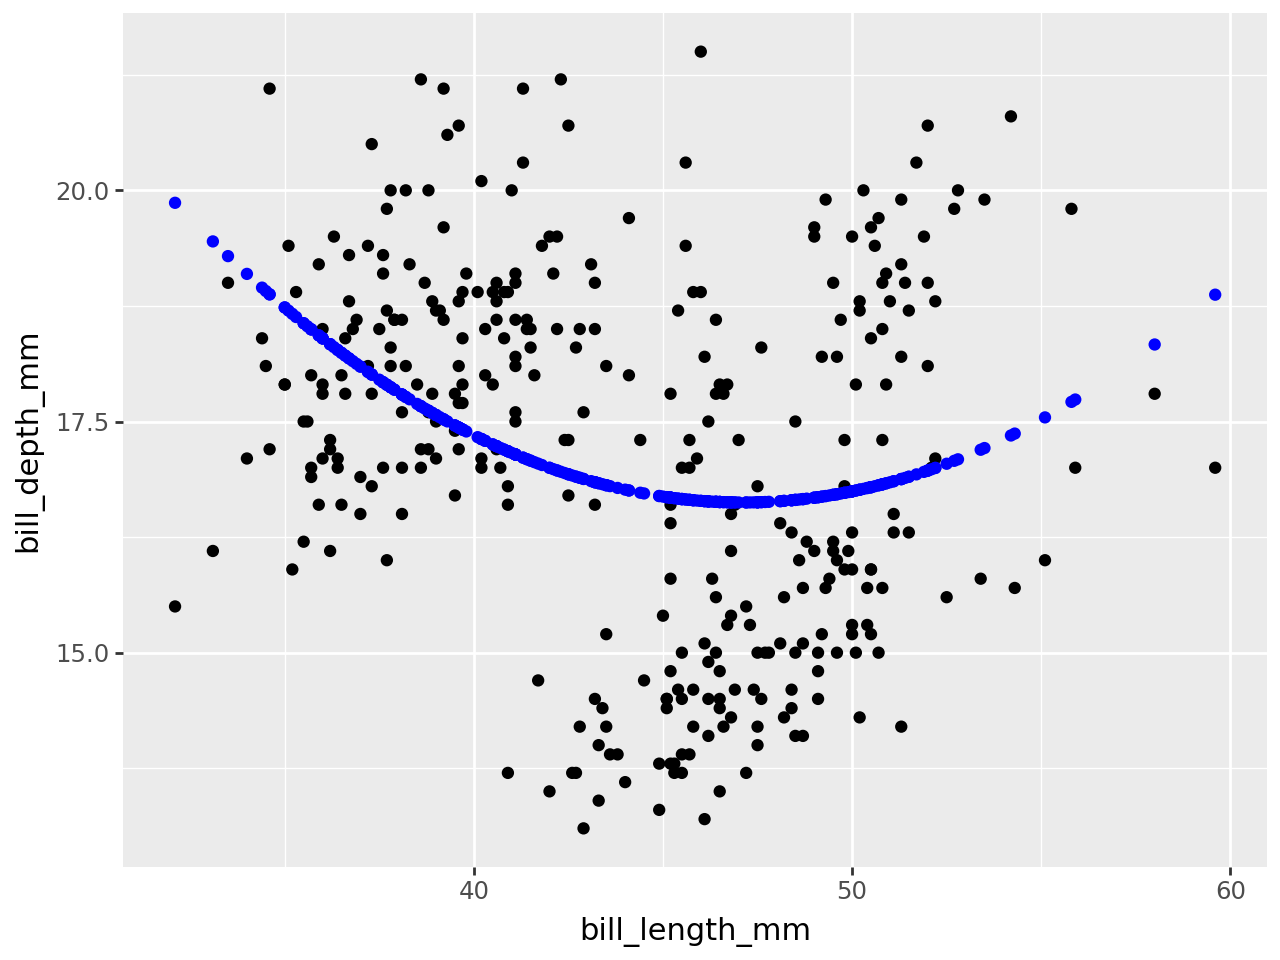

In [33]:
pred2 = lr_fit2.predict(X2)
(ggplot(penguins, aes(x="bill_length_mm", y="bill_depth_mm"))
+ geom_point()
+geom_point(aes(y=pred2), color="blue")
)


In [34]:
X3= penguins[["bill_length_mm", "bill_length_mm^2","bill_length_mm^3"]]
y3= penguins["bill_depth_mm"]
lr = LinearRegression()


from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.25)

lr_fit3= lr.fit(X3_train, y3_train)

Xtrain_preds3 = lr_fit3.predict(X3_train)
Xtest_preds3 = lr_fit3.predict(X3_test)


MSE_lr3= mean_squared_error(y3_test, Xtest_preds3)
print(MSE_lr3)

r2_test3= r2_score(y3_test, Xtest_preds3)
r2_train3= r2_score(y3_train, Xtrain_preds3)
print(r2_test3)
print(r2_train3)


2.9039914975840633
0.13837240517192984
0.1342856668015603


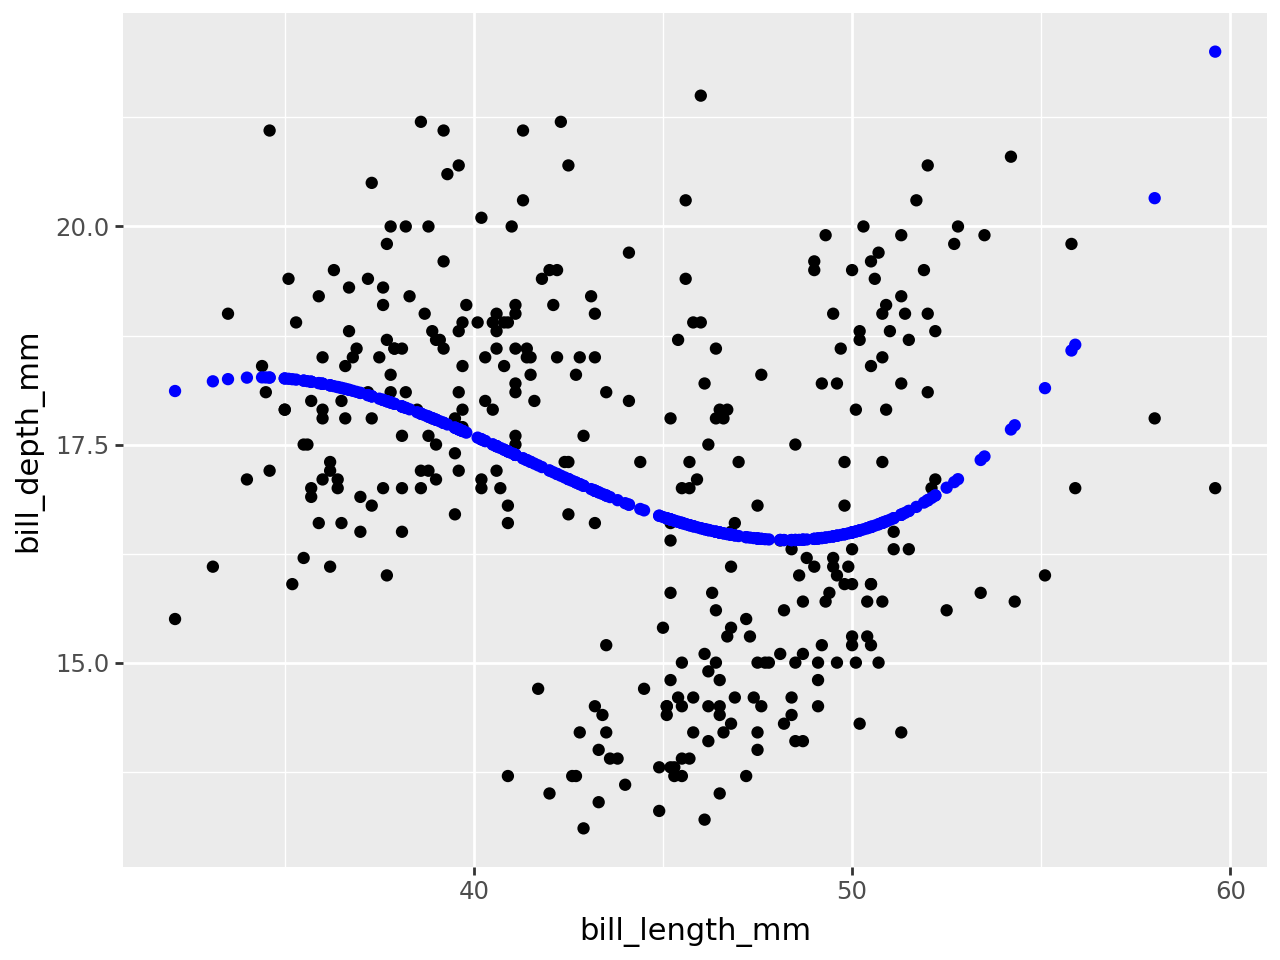

In [35]:
final_model = lr.fit(X3, y3)
final_model.coef_


pred3 = lr_fit3.predict(X3)
(ggplot(penguins, aes(x="bill_length_mm", y="bill_depth_mm"))
+ geom_point()
+geom_point(aes(y=pred3), color="blue")
)


* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

In [37]:
X10= penguins[["bill_length_mm", "bill_length_mm^2", "bill_length_mm^3", "bill_length_mm^4", "bill_length_mm^5", "bill_length_mm^6", "bill_length_mm^7", "bill_length_mm^8", "bill_length_mm^9", "bill_length_mm^10"]]
y10= penguins["bill_depth_mm"]
lr = LinearRegression()


from sklearn.model_selection import train_test_split
X10_train, X10_test, y10_train, y10_test = train_test_split(X10, y10, test_size=0.25)
lr_fit10= lr.fit(X10_train, y10_train)

Xtrain_preds10 = lr_fit10.predict(X10_train)
Xtest_preds10 = lr_fit10.predict(X10_test)


MSE_lr10= mean_squared_error(y10_test, Xtest_preds10)
print(MSE_lr10)



4.415031687058861


-0.21381163927542257
0.27823921230983784


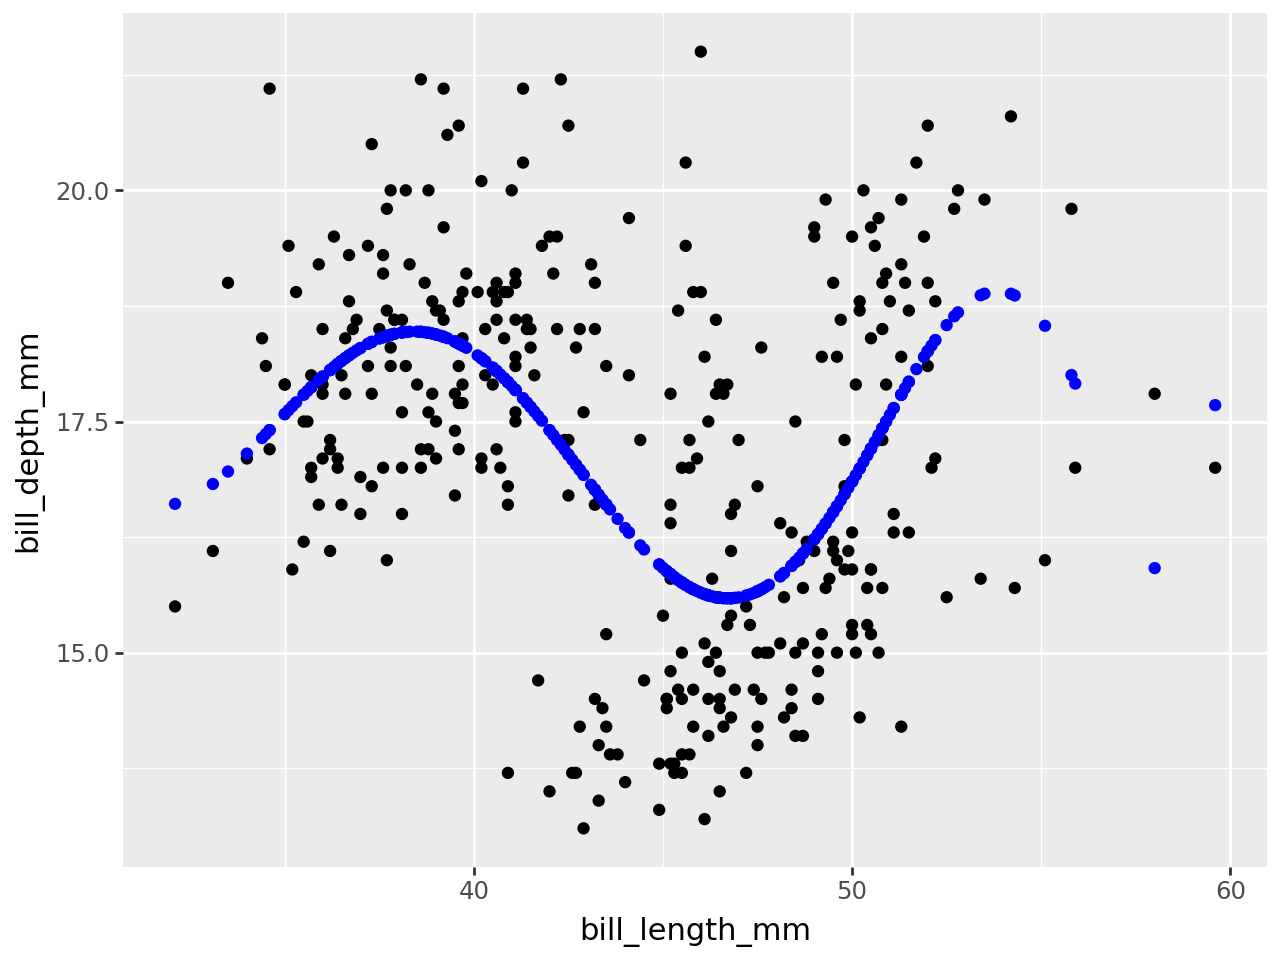

In [39]:
#rsquared
r2_test10= r2_score(y10_test, Xtest_preds10)
r2_train10= r2_score(y10_train, Xtrain_preds10)
print(r2_test10)
print(r2_train10)

0.22312876323983866
0.29657062084431185
0.22312876323983866
0.29657062084431185

final_model = lr.fit(X10, y10)
final_model.coef_


pred10 = lr_fit10.predict(X10)
(ggplot(penguins, aes(x="bill_length_mm", y="bill_depth_mm"))
+ geom_point()
+geom_point(aes(y=pred10), color="blue")
)

We can see from the data, that the cubic model is the best fit because it has the highest MSE (4.41) The graph also appears to predict the best visually as well.